In [1]:
import glob as gb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
import pandas as pd
%matplotlib inline
warnings.filterwarnings('ignore')

import nest_asyncio
nest_asyncio.apply()

import re

In [2]:
!pip3 install -qq twint
!pip install -qq whatthelang

import twint

In [3]:
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
!pip install polyglot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install PyICU

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install pycld2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install morfessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install vader-multi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import polyglot
from polyglot.text import Text, Word

In [10]:
Tesco = pd.read_csv('/content/tescostores_tweets.csv')

In [11]:
Tesco.shape

(32900, 36)

In [12]:
# drop duplicate tweets
Unique_Tesco = Tesco.drop_duplicates('tweet')
Unique_Tesco.shape

(19682, 36)

Sentiment Analysis using Rule based approach

In [13]:
Unique_Tesco.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [14]:
Unique_Tesco.hashtags

0                                   ['nothingsstoppingus']
2                                   ['nothingsstoppingus']
3                                                       []
5                                                       []
6                                                       []
                               ...                        
32895                                                   []
32896                                                   []
32897                                                   []
32898                                                   []
32899    ['costcutting', 'cutbacks', 'poorcustomerexper...
Name: hashtags, Length: 19682, dtype: object

In [15]:
# put only hashtags in front of the tweets

Unique_Tesco.hashtags = Unique_Tesco.hashtags.map(lambda x: eval(x))\
.map(lambda x: ['#' + tag for tag in x])


In [16]:
Tesco_Tweets =Unique_Tesco[['tweet', 'hashtags']].reset_index(drop=True)

In [17]:
Tesco_Tweets.head(10)

,tweet,hashtags
0,@Tesco #NothingsStoppingUs,[#nothingsstoppingus]
1,@Tesco #NothingsStoppingUs.,[#nothingsstoppingus]
2,@kenneth80376479 @Rosiecat2 @afneil If you thi...,[]
3,@lowRedPhoto @DrRosena I think Tesco still has...,[]
4,"@saderotica Tesco is the shit, except all of t...",[]
5,@Tesco #NothingsStoppingUs 🎉,[#nothingsstoppingus]
6,A truly mad year! Started it working PT for Te...,[]
7,Hopefully 2022 is the year we accept a trip to...,[]
8,@Tesco #NothingsStoppingUs.Happy New Year!!!,[#nothingsstoppingus]
9,"@ebelfastmum @BeebsyMcA I used to be ""only nol...",[]


Before cleaning

In [18]:
print(Tesco_Tweets.head().iloc[3][0]); print(Tesco_Tweets.head().iloc[3][1])

@lowRedPhoto @DrRosena I think Tesco still has some but they are closed today
[]


In [19]:
print('10 randomly selected Tweets Before cleaning:')
print('=============')
print(Tesco_Tweets['tweet'][1])
print(Tesco_Tweets['tweet'][13])
print(Tesco_Tweets['tweet'][2600])
print(Tesco_Tweets['tweet'][18])
print(Tesco_Tweets['tweet'][1500])
print(Tesco_Tweets['tweet'][5000])
print(Tesco_Tweets['tweet'][36])
print(Tesco_Tweets['tweet'][11350])
print(Tesco_Tweets['tweet'][1346])
print(Tesco_Tweets['tweet'][35])

10 randomly selected Tweets Before cleaning:
@Tesco #NothingsStoppingUs.
I accidentally smashed a bottle of vodka in Tesco earlier, happy new year everyone 🎉
@quirkyantiques @Tesco I’ll give that a go, thanks!
@CharlieL28 @Tesco New alternative meat content.
Having some friends over for. Father’s Day BBQ. Husband went to get a click and collect from @Tesco. Was waiting an hour in the car park - only to be told it would be another hour … not the most fun place for him to spend the day …
Just been to @Tesco Extra in Doncaster, no fridges or freezers working, no staff on checkouts, no fuel, what’s the point?
Hey @Tesco, as you plan the year ahead at today’s AGM, I hope that you’re prioritising ending the cruel use of FrankenChickens in your supply chain. #EveryLittleHelps
@Tesco I called you’re customers services on Monday 13.06.22 as our delivery driver has caused damage to our dropped pavementWe have this clearly shown on our CCTV. I was assured the store manager would call me but he ha

In [20]:
before_cleaning = Tesco_Tweets.copy()

##Data Cleaning with Regular Expression

In [21]:
Tesco_Tweets.tweet = Tesco_Tweets.tweet.map(lambda x: re.sub(r"http\S+", '', x))\
.map(lambda x: re.sub(r"@\S+", '', x))\
.map(lambda x: x.lower())

Tesco_Tweets['tweet'] = Tesco_Tweets.apply(lambda x: [word for word in x['tweet'].split() if word not in x['hashtags']], axis =1)\
.map(lambda x: ' '.join(x))

Tesco_Tweets = Tesco_Tweets.drop(columns = ['hashtags'])

In [22]:
print('10 randomly selected Tweets After Ceaning:')
print('=============')
print(Tesco_Tweets['tweet'][1])
print(Tesco_Tweets['tweet'][13])
print(Tesco_Tweets['tweet'][2600])
print(Tesco_Tweets['tweet'][18])
print(Tesco_Tweets['tweet'][1500])
print(Tesco_Tweets['tweet'][5000])
print(Tesco_Tweets['tweet'][36])
print(Tesco_Tweets['tweet'][11350])
print(Tesco_Tweets['tweet'][1346])
print(Tesco_Tweets['tweet'][35])

10 randomly selected Tweets After Ceaning:
#nothingsstoppingus.
i accidentally smashed a bottle of vodka in tesco earlier, happy new year everyone 🎉
i’ll give that a go, thanks!
new alternative meat content.
having some friends over for. father’s day bbq. husband went to get a click and collect from was waiting an hour in the car park - only to be told it would be another hour … not the most fun place for him to spend the day …
just been to extra in doncaster, no fridges or freezers working, no staff on checkouts, no fuel, what’s the point?
hey as you plan the year ahead at today’s agm, i hope that you’re prioritising ending the cruel use of frankenchickens in your supply chain.
i called you’re customers services on monday 13.06.22 as our delivery driver has caused damage to our dropped pavementwe have this clearly shown on our cctv. i was assured the store manager would call me but he hasn’t. can someone chase this up
😂🙌🏼
wasn’t me i fell to my knees in tesco


#Get subjectivity and polarity using TextBlob#

In [23]:
#subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create 2 new columns 
Tesco_Tweets['Subjectivity'] = Tesco_Tweets['tweet'].apply(getSubjectivity)

Tesco_Tweets['Polarity'] = Tesco_Tweets['tweet'].apply(getPolarity)

#show new dataframe with the new columns
Tesco_Tweets

,tweet,Subjectivity,Polarity
0,,0.000000,0.000000
1,#nothingsstoppingus.,0.000000,0.000000
2,if you think of the world as a collection of s...,0.711111,0.211111
3,i think tesco still has some but they are clos...,0.100000,-0.100000
4,"tesco is the shit, except all of their sandwic...",0.900000,-0.350000
...,...,...,...
19677,ok tesco calm down,0.512963,0.214815
19678,"what a day!! survived on 2 hours kip, nearly f...",0.400000,0.125000
19679,looks a bit undercooked to me mate 👀,0.000000,0.000000
19680,"not having a tesco clubcard is a massive ick, ...",1.000000,0.000000


**visualize all the text using word cloud**

In [24]:
from wordcloud import WordCloud

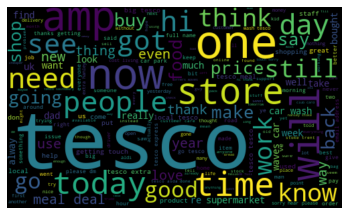

In [25]:
allwords = ' '.join([twts for twts in Tesco_Tweets['tweet']])
wordCloud = WordCloud(width = 500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [26]:
#creat a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


Tesco_Tweets['Analysis'] = Tesco_Tweets['Polarity'].apply(getAnalysis)

#shows dataframe
Tesco_Tweets



,tweet,Subjectivity,Polarity,Analysis
0,,0.000000,0.000000,Neutral
1,#nothingsstoppingus.,0.000000,0.000000,Neutral
2,if you think of the world as a collection of s...,0.711111,0.211111,Positive
3,i think tesco still has some but they are clos...,0.100000,-0.100000,Negative
4,"tesco is the shit, except all of their sandwic...",0.900000,-0.350000,Negative
...,...,...,...,...
19677,ok tesco calm down,0.512963,0.214815,Positive
19678,"what a day!! survived on 2 hours kip, nearly f...",0.400000,0.125000,Positive
19679,looks a bit undercooked to me mate 👀,0.000000,0.000000,Neutral
19680,"not having a tesco clubcard is a massive ick, ...",1.000000,0.000000,Neutral


In [27]:
#sort all postive tweets according to the most important 

j = 1

sorted_Tesco_Tweets = Tesco_Tweets.sort_values(by = ['Polarity'], ascending = 'True')
for i in range(0, sorted_Tesco_Tweets.shape[0]):
  if(sorted_Tesco_Tweets['Analysis'][i]=='Positve'):
    print(str(j) + ')' + sorted_Tesco_Tweets['tweet'][i])
    print()
    j = j +1

In [28]:
#sort all Negative tweets in descending order 

j = 1

sorted_Tesco_Tweets = Tesco_Tweets.sort_values(by = ['Polarity'], ascending = 'False')
for i in range(0, sorted_Tesco_Tweets.shape[0]):
  if(sorted_Tesco_Tweets['Analysis'][i]=='Negative'):
    print(str(j) + ')' + sorted_Tesco_Tweets['tweet'][i])
    print()
    j = j +1



Streaming output truncated to the last 5000 lines.
1575)sorry what 90p for a half can of heinz beans?! who pays that especially when there’s full cans of tesco brand nearby for 45p.

1576)should this transgender mp use the women's toilets at tesco? should he use the women's changing rooms at marks and spencers? should he shower with women and girls at the local pool? no? well done. common sense. now you're a terf. a hateful bigot. a nazi.

1577)i know. i work from home now in a relatively small city so it’s either the postman, the tesco delivery guy or the apps.

1578)knock it down. back when i was at tesco i was told the new “tin shed” style stores had a life expectancy of ~20 years, and rather than expensively refit a trad brick built store, it would easier and cheaper to simply build a totally new “tin shed”. that was about 20 years ago…

1579)in the last week, both atm’s in 2 tesco’s and morrison’s were all not working - odd 🤔

1580)£10.50 for a small box of hay fever tablets. are 

In [29]:
#sort all Neutral tweets in descending order 

j = 1

sorted_Tesco_Tweets = Tesco_Tweets.sort_values(by = ['Polarity'], ascending = 'False')
for i in range(0, sorted_Tesco_Tweets.shape[0]):
  if(sorted_Tesco_Tweets['Analysis'][i]=='Neutral'):
    print(str(j) + ')' + sorted_Tesco_Tweets['tweet'][i])
    print()
    j = j +1

Streaming output truncated to the last 5000 lines.
4867)i'm at in sheffield

4868)ano, jest parking pod fortem wola, ale nie jakoś specjalnie ogromny. p+r też jest o rzut beretem, ale nie wiem jak z dostępnością miejsc. z niewykorzystanych wielkich parkingów niedaleko, które na pewno będą puste, to jeszcze pod tesco na górczewskiej i stamtąd 10-ą.

4869)reject bayam merah 🤣 ke sebab bayam merah dekat tesco ni rasa tak sedap 🤣

4870)has it got what it takes?

4871)tesco roof: groan room - incoming! telfords warehouse 15 jul

4872)ve valmezu byly zastávky valašsk meziříčí, hřbitov a valašské meziříčí, u hřbitova. pak se jedna z nich přejmenovala na tesco.

4873)i'm gonna cry in the tesco car park noooo

4874)yeah there are definite regional variations but i am still shielding here - can only go to the tesco metro to shop nowhere else. and online deliveries are way more expensive here (can't get them any way).

4875)yes but could they not help lower costs on the food parcels your distribu

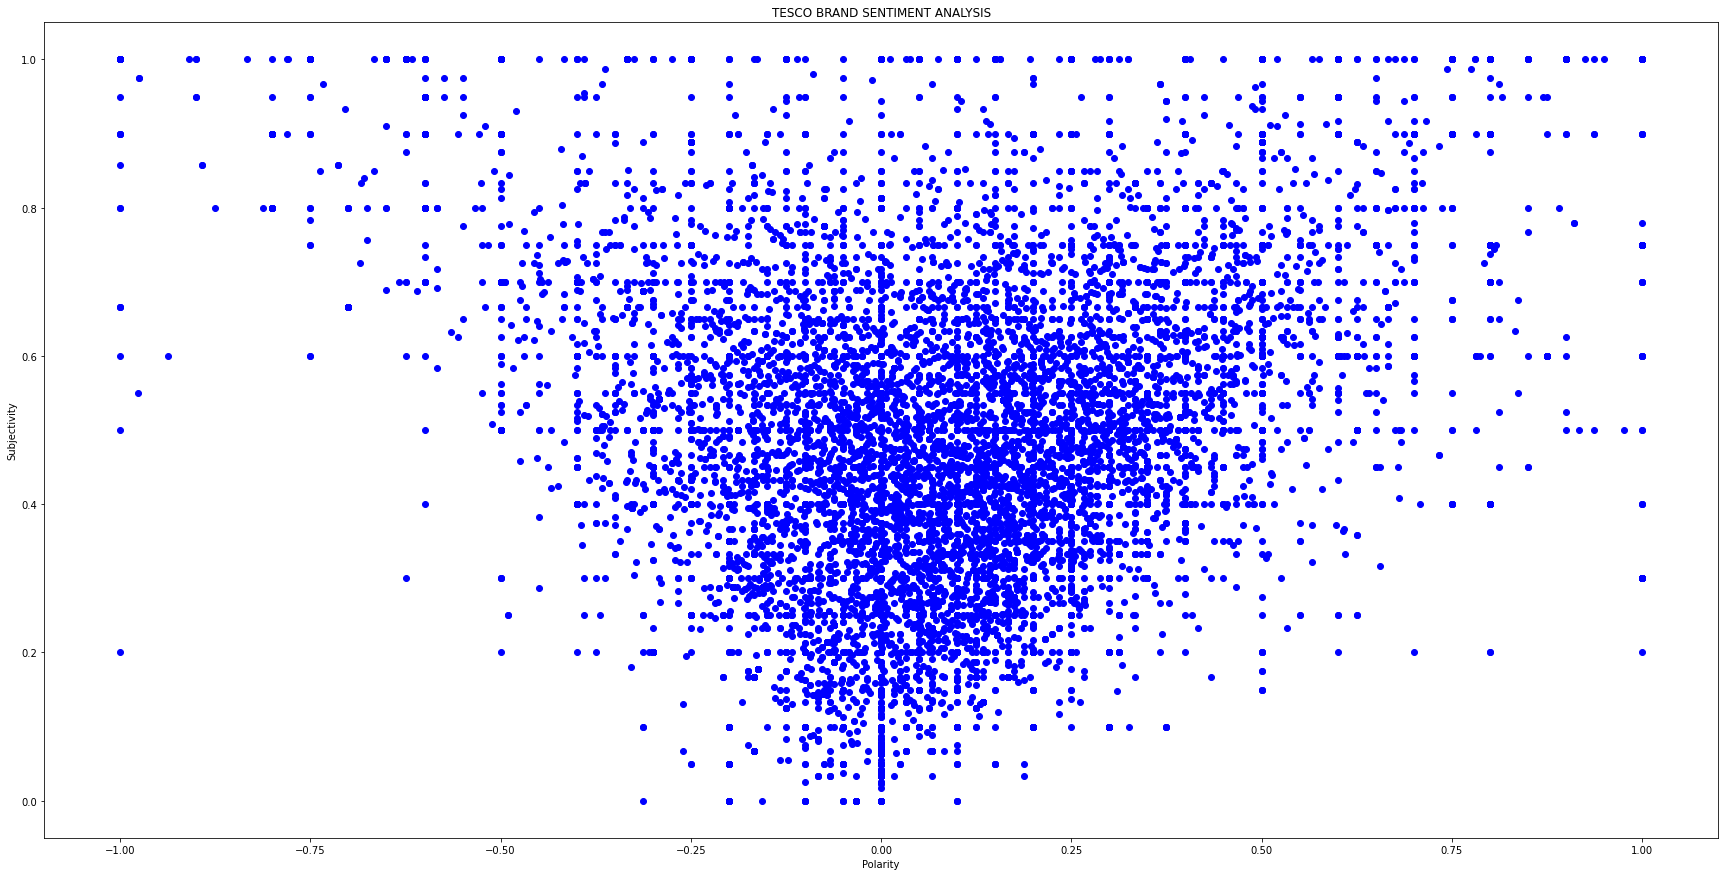

In [30]:
#SCATTER plot the polarity and subjectivity

plt.figure(figsize = (30,15))
for i in range(0, Tesco_Tweets.shape[0]):
  plt.scatter(Tesco_Tweets['Polarity'] [i], Tesco_Tweets['Subjectivity'] [i], color = 'Blue')


plt.title('TESCO BRAND SENTIMENT ANALYSIS')
plt.xlabel ('Polarity')
plt.ylabel ('Subjectivity')
plt.show()

In [31]:
# to get he percentage of positive tweets 

positive_tweets = Tesco_Tweets[Tesco_Tweets.Analysis == 'Positive']

positive_tweets = positive_tweets ['tweet']

round((positive_tweets.shape[0] / Tesco_Tweets.shape[0]) *100, 1)


41.9

In [32]:
negative_tweets = Tesco_Tweets[Tesco_Tweets.Analysis == 'Negative']

negative_tweets = negative_tweets ['tweet']

round((negative_tweets.shape[0] / Tesco_Tweets.shape[0]) *100, 1)

20.7

In [33]:
neutral_tweets = Tesco_Tweets[Tesco_Tweets.Analysis == 'Neutral']

neutral_tweets = neutral_tweets ['tweet']

round((neutral_tweets.shape[0] / Tesco_Tweets.shape[0]) *100, 1)

37.4

In [34]:
#show rthe value count
Tesco_Tweets ['Analysis'].value_counts()

Positive    8242
Neutral     7366
Negative    4074
Name: Analysis, dtype: int64

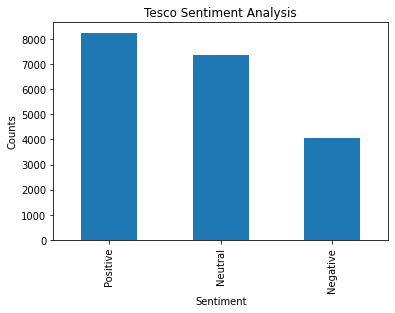

In [35]:
#plot and visualise the counts
plt.title('Tesco Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel ('Counts')
Tesco_Tweets['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

##Another way to get the subjectivity and polarity using Functions

In [36]:
polarity = lambda tweet: TextBlob(tweet).sentiment.polarity
subjectivity = lambda tweet: TextBlob(tweet).sentiment.subjectivity  

In [37]:
Tesco_Tweets.loc[:, 'polarity'] = Tesco_Tweets['tweet'].apply(polarity)
Tesco_Tweets.loc[:, 'subjectivity'] = Tesco_Tweets['tweet'].apply(subjectivity)

In [38]:
Tesco_Tweets.head()

,tweet,Subjectivity,Polarity,Analysis,polarity,subjectivity
0,,0.000000,0.000000,Neutral,0.000000,0.000000
1,#nothingsstoppingus.,0.000000,0.000000,Neutral,0.000000,0.000000
2,if you think of the world as a collection of s...,0.711111,0.211111,Positive,0.211111,0.711111
3,i think tesco still has some but they are clos...,0.100000,-0.100000,Negative,-0.100000,0.100000
4,"tesco is the shit, except all of their sandwic...",0.900000,-0.350000,Negative,-0.350000,0.900000


#Sentiment Classifcation

In [39]:
Tesco_Tweets['classification'] = np.zeros(Tesco_Tweets.shape[0])
Tesco_Tweets['classification'] = np.where(Tesco_Tweets['polarity'] >=0.05, 'positive', Tesco_Tweets['classification'])
Tesco_Tweets['classification'] = np.where(Tesco_Tweets['polarity'] <=-0.05, 'negative', Tesco_Tweets['classification'])
Tesco_Tweets['classification'] = np.where((Tesco_Tweets['polarity'] < 0.05) & (Tesco_Tweets['polarity'] > -0.05), 'neutral', Tesco_Tweets['classification'])

In [40]:
print(Tesco_Tweets[Tesco_Tweets.classification == 'positive'].reset_index()['tweet'][130])
print(Tesco_Tweets[Tesco_Tweets.classification == 'positive'].reset_index()['tweet'][511])
print(Tesco_Tweets[Tesco_Tweets.classification == 'positive'].reset_index()['tweet'][1873])
print(Tesco_Tweets[Tesco_Tweets.classification == 'positive'].reset_index()['tweet'][385])
print(Tesco_Tweets[Tesco_Tweets.classification == 'positive'].reset_index()['tweet'][428])

why does it take aldi to have better prices for you to lower yours? big mistake promoting aldi prices as it is giving them free advertising.
tesco are flogging peaky blinders themed cards.
livestream "no ethics at number 10", tories take on rail workers! tesco hit by cost of living! maximilien robespierre live #gtfto!
special offers. waves car wash. tesco extra hanley. stoke-on-trent. autoglym @ waves car wash
tesco mobile is the latest mobile network to abolish free roaming across the eu for new customers, as providers take advantage of brexit to charge customers steep fees for calls and data. another brexit bonus.


In [41]:
print(Tesco_Tweets[Tesco_Tweets.classification == 'negative'].reset_index()['tweet'][13])
print(Tesco_Tweets[Tesco_Tweets.classification == 'negative'].reset_index()['tweet'][581])
print(Tesco_Tweets[Tesco_Tweets.classification == 'negative'].reset_index()['tweet'][3373])
print(Tesco_Tweets[Tesco_Tweets.classification == 'negative'].reset_index()['tweet'][500])
print(Tesco_Tweets[Tesco_Tweets.classification == 'negative'].reset_index()['tweet'][728])

tesco scam warning: hotmail and gmail users put on alert about fake gift card emails - express
in today's issue: tesco customers feeling squeezed and buying less revlon files for bankruptcy after 90 years in business
it’s time price discrimination was made illegal.
shitty tesco tomatoes and cucumber with black pepper and salt.
i hate doing car insurance quotes and then sorting out cancelling of policies. looking at car insurance today and saw this little note about not doing an auto renewal. conversely, i've got 50 questions to answer to cancel my insurance with admiral 😡


In [42]:
print(Tesco_Tweets[Tesco_Tweets.classification == 'negative'].reset_index()['tweet'][35])
print(Tesco_Tweets[Tesco_Tweets.classification == 'negative'].reset_index()['tweet'][2200])
print(Tesco_Tweets[Tesco_Tweets.classification == 'negative'].reset_index()['tweet'][1000])
print(Tesco_Tweets[Tesco_Tweets.classification == 'negative'].reset_index()['tweet'][2500])
print(Tesco_Tweets[Tesco_Tweets.classification == 'negative'].reset_index()['tweet'][800])

when you’re standing in tesco’s in the chocolate section for about half an hour trying to pick your next chocolate for your morning oats 😂 🤦🏼‍♀️
1 tesco: 03 towers of 132 kv tal-3 transmission line have damaged at 17:40 hrs on 14.06.2022hrsy due to heavy windstorm.
my dad deserves a treat. he is in and out of hospital and loves a bbq and a few beers.
i know it's late and it's cold outside and i'm way too tired to cycle and i have desserts at home, but i have a craving for puff pastry and i'm wondering whether it's worth cycling out to the 24hr tesco's three miles out of town to buy some and make a tart.
moment tesco worker reacts to his favourite customer’s pregnancy is seriously heartwarming


In [43]:
Tesco_Tweets.head()

,tweet,Subjectivity,Polarity,Analysis,polarity,subjectivity,classification
0,,0.000000,0.000000,Neutral,0.000000,0.000000,neutral
1,#nothingsstoppingus.,0.000000,0.000000,Neutral,0.000000,0.000000,neutral
2,if you think of the world as a collection of s...,0.711111,0.211111,Positive,0.211111,0.711111,positive
3,i think tesco still has some but they are clos...,0.100000,-0.100000,Negative,-0.100000,0.100000,negative
4,"tesco is the shit, except all of their sandwic...",0.900000,-0.350000,Negative,-0.350000,0.900000,negative


In [44]:
Tesco_Tweets.classification.value_counts()

neutral     8436
positive    7693
negative    3553
Name: classification, dtype: int64

**Examine the tweet by Classification**

In [45]:
# Neutral Tweet classification
Tesco_neutral_tweets = Tesco_Tweets[Tesco_Tweets.classification == 'neutral'].reset_index(drop=True)
Tesco_neutral_tweets.head(10)

,tweet,Subjectivity,Polarity,Analysis,polarity,subjectivity,classification
0,,0.000000,0.000000,Neutral,0.000000,0.000000,neutral
1,#nothingsstoppingus.,0.000000,0.000000,Neutral,0.000000,0.000000,neutral
2,🎉,0.000000,0.000000,Neutral,0.000000,0.000000,neutral
3,tesco but it's my last shift so if you know of...,0.066667,0.000000,Neutral,0.000000,0.066667,neutral
4,i am obsessed with the cat in the tesco bag!!!...,1.000000,0.011719,Positive,0.011719,1.000000,neutral
5,,0.000000,0.000000,Neutral,0.000000,0.000000,neutral
6,ooooh i know someone who works in tesco..thank...,0.000000,0.000000,Neutral,0.000000,0.000000,neutral
7,just watching you on c4+1 so unsure when you w...,0.000000,0.000000,Neutral,0.000000,0.000000,neutral
8,psa: tesco finest salted caramel nuts are addi...,0.900000,0.000000,Neutral,0.000000,0.900000,neutral
9,jeździsz dla tesco?,0.000000,0.000000,Neutral,0.000000,0.000000,neutral


In [46]:
print(Tesco_neutral_tweets.tweet[155])
print(Tesco_neutral_tweets.tweet[361])
print(Tesco_neutral_tweets.tweet[400])
print(Tesco_neutral_tweets.tweet[655])
print(Tesco_neutral_tweets.tweet[7899])

my tesco doesn't make pizza's?
hi, thanks for getting in touch. i'm sorry this has happened. if you could please dm us with your name, address and email address we can certainly pass this on to the store that delivered your order. thanks - iain
lidl, aldi, morrisons, sainsbury's, tesco and asda were all put to the test
that's almost 20% of my order 😭
if it's lichfield u will be in drivers room with all there staff🙈🙈🙈


In [47]:
#Positive tweets classification
Tesco_positive_tweets = Tesco_Tweets[Tesco_Tweets.classification == 'positive'].reset_index(drop=True)
Tesco_positive_tweets.head(10)

,tweet,Subjectivity,Polarity,Analysis,polarity,subjectivity,classification
0,if you think of the world as a collection of s...,0.711111,0.211111,Positive,0.211111,0.711111,positive
1,#nothingsstoppingus.happy new year!!!,0.454545,0.266335,Positive,0.266335,0.454545,positive
2,"i used to be ""only nolly pratt will do"" then o...",0.766667,0.533333,Positive,0.533333,0.766667,positive
3,i live in constant fear as i never know when m...,0.416667,0.068182,Positive,0.068182,0.416667,positive
4,i accidentally smashed a bottle of vodka in te...,0.651515,0.312121,Positive,0.312121,0.651515,positive
5,i think we can all agree that this country’s c...,0.375000,0.175000,Positive,0.175000,0.375000,positive
6,when i was working on the tills at tesco i hav...,0.888889,0.500000,Positive,0.500000,0.888889,positive
7,new alternative meat content.,0.454545,0.136364,Positive,0.136364,0.454545,positive
8,and she's local. i've seen her in our local te...,0.166667,0.166667,Positive,0.166667,0.166667,positive
9,there are many factors. i had tesco delivery b...,0.775000,0.050000,Positive,0.050000,0.775000,positive


In [48]:
print(Tesco_positive_tweets.tweet[1225])
print(Tesco_positive_tweets.tweet[258])
print(Tesco_positive_tweets.tweet[4788])
print(Tesco_positive_tweets.tweet[2358])
print(Tesco_positive_tweets.tweet[1358])

don’t care + you mans play non league football. focus on getting a good football club rather than tweeting about tesco
same with tesco. they run out of veggie toppings but won't allow you to walk 5 yards to actually get some more.
if 5 people sent me £2 i could go to big tesco i’ll leave my paypal here if you’re interested yungmoneyrobert420xx
i find most pay at pump experiences lack endings. like, you’re left hanging asking if you want a receipt but there’s nothing that tells you you’ve successfully completed a transaction.
request from a great actor i worked with connor swindells - please print bowel cancer symptoms on your toilet rolls! people like my dad could be alive if they find out sooner.


In [49]:
#Negative tweets classification
Tesco_negative_tweets = Tesco_Tweets[Tesco_Tweets.classification == 'negative'].reset_index(drop=True)
Tesco_negative_tweets.head(10)

,tweet,Subjectivity,Polarity,Analysis,polarity,subjectivity,classification
0,i think tesco still has some but they are clos...,0.100000,-0.100000,Negative,-0.100000,0.100000,negative
1,"tesco is the shit, except all of their sandwic...",0.900000,-0.350000,Negative,-0.350000,0.900000,negative
2,a truly mad year! started it working pt for te...,0.387963,-0.074432,Negative,-0.074432,0.387963,negative
3,hopefully 2022 is the year we accept a trip to...,0.450000,-0.300000,Negative,-0.300000,0.450000,negative
4,we had a few bombers thrown at our car when we...,0.255556,-0.198611,Negative,-0.198611,0.255556,negative
5,seriously . tesco wine and bernardspotting in ...,0.666667,-0.333333,Negative,-0.333333,0.666667,negative
6,"if . really believes that #everylittlehelps, w...",0.630000,-0.152727,Negative,-0.152727,0.630000,negative
7,"hey as you plan the year ahead at today’s agm,...",1.000000,-1.000000,Negative,-1.000000,1.000000,negative
8,"hi hannah, i'm sorry this side salad was not t...",0.400000,-0.225000,Negative,-0.225000,0.400000,negative
9,i'm actually queueing for tesco with 3 other p...,0.237500,-0.062500,Negative,-0.062500,0.237500,negative


In [50]:
print(Tesco_negative_tweets.tweet[258])
print(Tesco_negative_tweets.tweet[2158])
print(Tesco_negative_tweets.tweet[254])
print(Tesco_negative_tweets.tweet[2580])
print(Tesco_negative_tweets.tweet[958])

hi i am very sorry for making you go to tesco for pens for my quiz.
new sale on at tesco! trade in 2 gallons of vape juice to get a copy of speedy coileain the game for the xbox 360!
when you go to tesco only for 3 items, to make another key lime pie, (because you forgot to turn the oven down and burnt it)🤦‍♀️😡....
does anyone feel that the app is purposely difficult to sign into so you can't get clubcard discounts?
tesco works for the uk not the other way round.


**Using Vader Method**

In [51]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(Tesco_neutral_tweets.tweet[0])

{'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}

In [52]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(Tesco_positive_tweets.tweet[0])

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.944, 'pos': 0.056}

In [53]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(Tesco_negative_tweets.tweet[0])

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [54]:
Vader = lambda tweet: vader.polarity_scores(tweet)['compound']

In [55]:
Tesco_Tweets.loc[:, 'compound'] = Tesco_Tweets['tweet'].apply(Vader)

In [56]:
Tesco_Tweets

,tweet,Subjectivity,Polarity,Analysis,polarity,subjectivity,classification,compound
0,,0.000000,0.000000,Neutral,0.000000,0.000000,neutral,0.0000
1,#nothingsstoppingus.,0.000000,0.000000,Neutral,0.000000,0.000000,neutral,0.0000
2,if you think of the world as a collection of s...,0.711111,0.211111,Positive,0.211111,0.711111,positive,0.4404
3,i think tesco still has some but they are clos...,0.100000,-0.100000,Negative,-0.100000,0.100000,negative,0.0000
4,"tesco is the shit, except all of their sandwic...",0.900000,-0.350000,Negative,-0.350000,0.900000,negative,0.6908
...,...,...,...,...,...,...,...,...
19677,ok tesco calm down,0.512963,0.214815,Positive,0.214815,0.512963,positive,0.5423
19678,"what a day!! survived on 2 hours kip, nearly f...",0.400000,0.125000,Positive,0.125000,0.400000,positive,-0.5826
19679,looks a bit undercooked to me mate 👀,0.000000,0.000000,Neutral,0.000000,0.000000,neutral,0.0000
19680,"not having a tesco clubcard is a massive ick, ...",1.000000,0.000000,Neutral,0.000000,1.000000,neutral,-0.2960


In [57]:
Tesco_Tweets['classification2'] = np.zeros(Tesco_Tweets.shape[0])
Tesco_Tweets['classification2'] = np.where(Tesco_Tweets['compound'] >=0.05, 'positive', Tesco_Tweets['classification2'])
Tesco_Tweets['classification2'] = np.where(Tesco_Tweets['compound'] <=-0.05, 'negative', Tesco_Tweets['classification2'])
Tesco_Tweets['classification2'] = np.where((Tesco_Tweets['compound'] < 0.05) & (Tesco_Tweets['compound'] > -0.05), 'neutral', Tesco_Tweets['classification2'])

In [71]:
Tesco_Tweets

,tweet,Subjectivity,Polarity,Analysis,polarity,subjectivity,classification,compound,classification2,classification3
0,,0.000000,0.000000,Neutral,0.000000,0.000000,neutral,0.0000,neutral,Objective
1,#nothingsstoppingus.,0.000000,0.000000,Neutral,0.000000,0.000000,neutral,0.0000,neutral,Objective
2,if you think of the world as a collection of s...,0.711111,0.211111,Positive,0.211111,0.711111,positive,0.4404,positive,Subjective
3,i think tesco still has some but they are clos...,0.100000,-0.100000,Negative,-0.100000,0.100000,negative,0.0000,neutral,Objective
4,"tesco is the shit, except all of their sandwic...",0.900000,-0.350000,Negative,-0.350000,0.900000,negative,0.6908,positive,Subjective
...,...,...,...,...,...,...,...,...,...,...
19677,ok tesco calm down,0.512963,0.214815,Positive,0.214815,0.512963,positive,0.5423,positive,Subjective
19678,"what a day!! survived on 2 hours kip, nearly f...",0.400000,0.125000,Positive,0.125000,0.400000,positive,-0.5826,negative,Objective
19679,looks a bit undercooked to me mate 👀,0.000000,0.000000,Neutral,0.000000,0.000000,neutral,0.0000,neutral,Objective
19680,"not having a tesco clubcard is a massive ick, ...",1.000000,0.000000,Neutral,0.000000,1.000000,neutral,-0.2960,negative,Subjective


In [72]:
Tesco_Tweets.classification2.value_counts()

positive    8493
neutral     6618
negative    4571
Name: classification2, dtype: int64

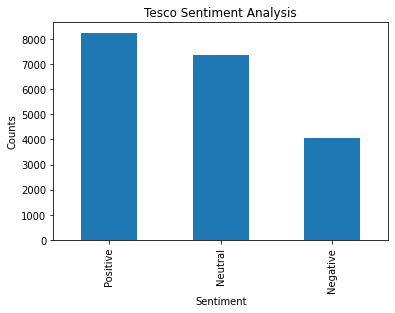

In [73]:
#plot and visualise the counts
plt.title('Tesco Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel ('Counts')
Tesco_Tweets['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [60]:
#further look into positive Vader classification2 
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'positive'].reset_index()['tweet'][1])
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'positive'].reset_index()['tweet'][33])
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'positive'].reset_index()['tweet'][4200])
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'positive'].reset_index()['tweet'][955])
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'positive'].reset_index()['tweet'][5000])

tesco is the shit, except all of their sandwiches always have some weird jelly on them ha.
whether or not you've pooped in a tesco, this thread is important.
this is so funny bc there’s a mini tesco, a mini sainsburys and a londis at a walkable distance from where i live - but do i ever go there ? not unless my parents need time to go buy milk or smth 💀
hi coco, we appreciate that you have sent that through. i will look into the recipe change now and get back in touch when i have more information on this. thanks - aiden
special offers. waves car wash. tesco extra hanley. stoke-on-trent. autoglym. @ waves car wash


In [61]:
#further look into neutral Vader classification2 
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'neutral'].reset_index()['tweet'][300])
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'neutral'].reset_index()['tweet'][150])
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'neutral'].reset_index()['tweet'][50])
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'neutral'].reset_index()['tweet'][500])
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'neutral'].reset_index()['tweet'][680])

i can’t say about tesco - don’t shop there i’m afraid. i would assume the choice (best seller) and sponsored (paid for) is the same premise.
proper want fizzy drink from tesco but it’s not open😡
costa chap, nero nonce, lidl lad, tesco twink, waitrose weenie
did you give him a tesco trolly token
what's happened to your fruit drops? haven't had any in for weeks. 😬


In [62]:
#further look into negative Vader classification2 
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'negative'].reset_index()['tweet'][100])
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'negative'].reset_index()['tweet'][250])
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'negative'].reset_index()['tweet'][700])
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'negative'].reset_index()['tweet'][2100])
print(Tesco_Tweets[Tesco_Tweets.classification2 == 'negative'].reset_index()['tweet'][1350])

i resent the video recorders at the self checkouts at various retailers. i avoid them when ever i can. if tesco bring in facial-recognition-only payment, they ain't getting any of my business. it's a completely unnecessary development.
that will be virgin media pushing for additional revenue. they are known to be greedy. tesco mobile is an mvno (mobile virtual network operator) and is owned 50/50 by tesco &amp; virgin/o2 &amp; uses the o2 network as a carrier
avoid tesco unless you’re looking for a swedish blonde 😎
i'm confused but strangely impressed that someone managed to steal a set of giant washing machines from outside tesco in celbridge
probably took about 40-45mins to get us back - dropped off at george square - if going for bus after then i would ask guy in high viz jacket at the bus stop across from tesco which queue to join as was a bit of chaos to start with queues all over the place


In [63]:
#crosstab function for comparing the classification of tweets 
pd.crosstab(Tesco_Tweets['classification'],Tesco_Tweets['classification2'])

classification2,negative,neutral,positive
classification,,,
negative,1871,721,961
neutral,1627,4684,2125
positive,1073,1213,5407


**Inspect the subjectivity**

In [64]:
Tesco_Tweets['classification3'] = np.zeros(Tesco_Tweets.shape[0])
Tesco_Tweets['classification3'] = np.where(Tesco_Tweets['subjectivity'] >0.5, 'Subjective', Tesco_Tweets['classification3'])
Tesco_Tweets['classification3'] = np.where(Tesco_Tweets['subjectivity'] <=0.5, 'Objective', Tesco_Tweets['classification3'])

In [65]:
Tesco_Tweets

,tweet,Subjectivity,Polarity,Analysis,polarity,subjectivity,classification,compound,classification2,classification3
0,,0.000000,0.000000,Neutral,0.000000,0.000000,neutral,0.0000,neutral,Objective
1,#nothingsstoppingus.,0.000000,0.000000,Neutral,0.000000,0.000000,neutral,0.0000,neutral,Objective
2,if you think of the world as a collection of s...,0.711111,0.211111,Positive,0.211111,0.711111,positive,0.4404,positive,Subjective
3,i think tesco still has some but they are clos...,0.100000,-0.100000,Negative,-0.100000,0.100000,negative,0.0000,neutral,Objective
4,"tesco is the shit, except all of their sandwic...",0.900000,-0.350000,Negative,-0.350000,0.900000,negative,0.6908,positive,Subjective
...,...,...,...,...,...,...,...,...,...,...
19677,ok tesco calm down,0.512963,0.214815,Positive,0.214815,0.512963,positive,0.5423,positive,Subjective
19678,"what a day!! survived on 2 hours kip, nearly f...",0.400000,0.125000,Positive,0.125000,0.400000,positive,-0.5826,negative,Objective
19679,looks a bit undercooked to me mate 👀,0.000000,0.000000,Neutral,0.000000,0.000000,neutral,0.0000,neutral,Objective
19680,"not having a tesco clubcard is a massive ick, ...",1.000000,0.000000,Neutral,0.000000,1.000000,neutral,-0.2960,negative,Subjective


**Randon inspection of tweet subjectivity and objectivity**

In [66]:
print(Tesco_Tweets[Tesco_Tweets.classification3 == 'Objective'].reset_index()['tweet'][120])
print(Tesco_Tweets[Tesco_Tweets.classification3 == 'Objective'].reset_index()['tweet'][200])
print(Tesco_Tweets[Tesco_Tweets.classification3 == 'Objective'].reset_index()['tweet'][300])
print(Tesco_Tweets[Tesco_Tweets.classification3 == 'Objective'].reset_index()['tweet'][400])
print(Tesco_Tweets[Tesco_Tweets.classification3 == 'Objective'].reset_index()['tweet'][500])

i do also wonder if this shopping was from. tesco express in which items cost more than a tesco extra or metro. i welcome being proved wrong but there are definitely some big ticket items that have bumped up the cost.
hmm blender tsuru tuneado nfs pepega mod speedrunning tesco game i guess that's all i remember that's not complete
sue leach in york got a top rating on follow &amp; we'll dm the info.
they’ve told me why they couldn’t tell i wasn’t a pig. firstly the actor thought i worked in tesco so everyone pretended i was. secondly they bred me like a pig in the rejection rape so they could have skids with someone else
where do you suggest? the end of clacton pier or the car park at pitsea tesco?


In [67]:
print(Tesco_Tweets[Tesco_Tweets.classification3 == 'Subjective'].reset_index()['tweet'][600])
print(Tesco_Tweets[Tesco_Tweets.classification3 == 'Subjective'].reset_index()['tweet'][700])
print(Tesco_Tweets[Tesco_Tweets.classification3 == 'Subjective'].reset_index()['tweet'][800])
print(Tesco_Tweets[Tesco_Tweets.classification3 == 'Subjective'].reset_index()['tweet'][900])
print(Tesco_Tweets[Tesco_Tweets.classification3 == 'Subjective'].reset_index()['tweet'][1000])

why don’t you offer bbqs on mothering sunday? don’t you know women do all the cooking (according to uour gender playbook)?plus, i’d prefer one to a boring, smelly old candle.
sorry guys, not walking round tesco for 4 hours. maybe for a playoff game.
don't miss out on this intimate setting of unit 44;where ben prevo is filling the air with fabulous music. you can join in too and play or sing a few tunes 🎶 this is s very lovely chilled out eve. unit 44 - park shopping centre, prussia st where tesco's is. it's next to pieces.
hi alexia, i'm sorry to hear about the issue with your order. can you please send us a dm with your full name, address and email address? i look forward to hearing from you. thanks - jordan
don’t care + you mans play non league football. focus on getting a good football club rather than tweeting about tesco


In [68]:
pd.crosstab(Tesco_Tweets['classification'], Tesco_Tweets['classification3'])

classification3,Objective,Subjective
classification,,
negative,1802,1751
neutral,7777,659
positive,4091,3602


In [69]:
pd.crosstab(Tesco_Tweets['classification2'], Tesco_Tweets['classification3'])

classification3,Objective,Subjective
classification2,,
negative,2793,1778
neutral,5905,713
positive,4972,3521


In [70]:
pd.crosstab(Tesco_Tweets['classification3'], Tesco_Tweets['classification'])

classification,negative,neutral,positive
classification3,,,
Objective,1802,7777,4091
Subjective,1751,659,3602
